In [13]:
import scipy.stats as sc
import numpy as np
import matplotlib.pyplot as plt

# Q2.1

In [14]:
# given 
mu = 112
sd = 8
normalDist = sc.norm(mu,sd)

* What is the probability that chemical concentration equals 113? Is less than 105? Is at most
105?
* What is the probability that chemical concentration differs from mean by more than 1
standard deviation? Does this probability depend on the values of 𝜇and 𝜎?
* How would you characterize the most extreme 0.15% of chemical concentration values?

In [15]:
# x equal 113
# for a continuous random variable, the probability at 
# a fixed point is equal to zero.
equal_to_113 = 0

# x less than 105 and x less than equal to 105
# are the same because P(x=105) = 0
less_than_105 = normalDist.cdf(105)
print("x less than 105 = ",less_than_105)

# x more than mu+sd or x less than mu-sd

more_than_one_sd = normalDist.sf(mu+sd)
less_than_one_sd = normalDist.cdf(mu-sd)
differs_by_one_sd = more_than_one_sd+less_than_one_sd
print("x differs by one sd = ",differs_by_one_sd)

# x more than mu+3sd or x less than mu-3sd

more_than_3_sd = normalDist.sf(mu+3*sd)
less_than_3_sd = normalDist.cdf(mu-3*sd)
differs_by_3_sd = more_than_3_sd+less_than_3_sd
print("x differs by three sd = ",differs_by_3_sd)

x less than 105 =  0.19078695285251068
x differs by one sd =  0.31731050786291415
x differs by three sd =  0.0026997960632601866


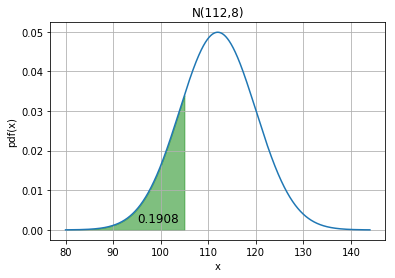

In [16]:
fig, ax = plt.subplots()
# for distribution curve
x= np.arange(80,144,0.001)
ax.plot(x, normalDist.pdf(x))
ax.set_title("N(112,8)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)

px=np.arange(80,105,0.01)
ax.fill_between(px,normalDist.pdf(px),alpha=0.5, color='g')
ax.text(95,0.002,round(less_than_105,4), fontsize=12)

plt.show()

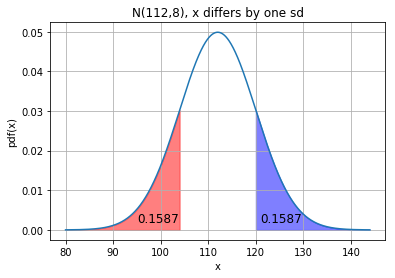

In [17]:
fig, ax = plt.subplots()
# for distribution curve
x= np.arange(80,144,0.001)
ax.plot(x, normalDist.pdf(x))
ax.set_title("N(112,8), x differs by one sd")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)

px=np.arange(80,mu-sd,0.01)
ax.fill_between(px,normalDist.pdf(px),alpha=0.5, color='r')
ax.text(95,0.002,round(less_than_one_sd,4), fontsize=12)

px=np.arange(mu+sd,144,0.01)
ax.fill_between(px,normalDist.pdf(px),alpha=0.5, color='b')
ax.text(121,0.002,round(more_than_one_sd,4), fontsize=12)

plt.show()

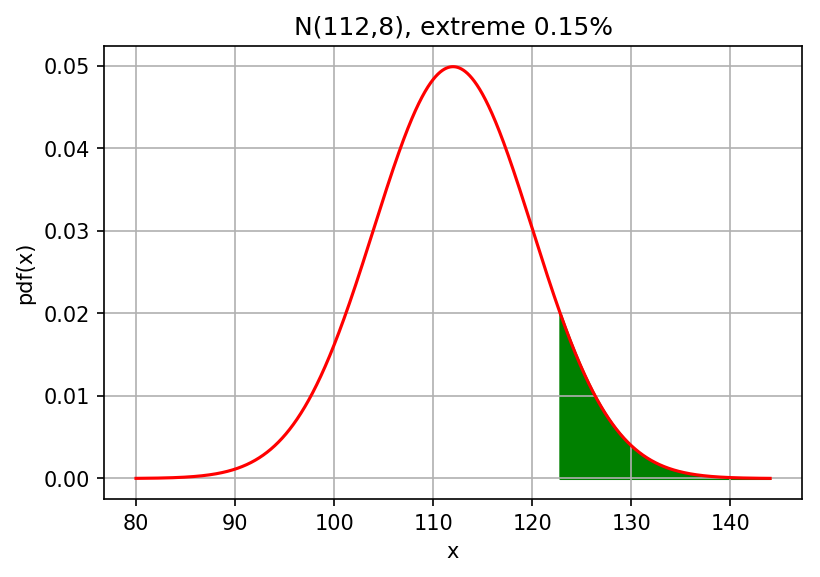

In [26]:
fig, ax = plt.subplots()
fig.set_dpi(150)
x= np.arange(80,144,0.001)
ax.plot(x, normalDist.pdf(x),'r')
ax.set_title("N(112,8), extreme 0.15%")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)

px=np.arange(80,mu-3*sd,0.001)
ax.fill_between(px,normalDist.pdf(px),alpha=1, color='g')

px=np.arange(mu+3*sd,144,0.001)
ax.fill_between(px,normalDist.pdf(px),alpha=1, color='g')

plt.show()

# Q2.2

In [19]:
# given 

n = 15
x = np.array([105.6, 90.9, 91.2, 96.9, 96.5, 91.3, 101.1, 105.3, 107.7, 102.6, 98.7, 92.4, 93.7, 104.3, 103.5])
mu0 = 100
mu = np.mean(x)
alpha = 0.05
mu

98.78

**hypothesis mu != mu0**

* rejection region
```
t <= -t(alpha/2,n-1)
or
t >= t(alpha/2,n-1)
```

i.e. 

```
|t| < t(alpha/2,n-1)
```

In [20]:
# rejection region 
tr = sc.t.ppf((1-alpha/2),n-1)
tr

2.1447866879169273

**test static**
```
t = (mu-mu0) / (s/root(n))
```

In [21]:
s = np.std(x,ddof = 1)
t = (mu-mu0)/(s/(n**0.5))

-tr <= abs(t) <= tr,s,t

(True, 5.928526677972239, -0.7970006612147306)

# Q3.1

In [28]:
y = np.array([90,115,121,138,155,182])
x = np.array([120,106,95,70,65,58])

In [29]:
res = sc.linregress(x,y)
print("the slope and intercepts are: ",res.slope,res.intercept)

the slope and intercepts are:  -1.2327844311377245 239.10853293413174


In [30]:
res.slope*60+res.intercept

165.14146706586826

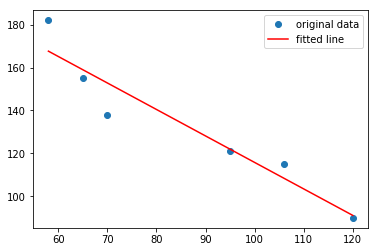

In [31]:
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()